# - Business Problem - 
A Marketing Agency wants to maximise the ROI(return on investment) for their client's advertising campaign.They conducted two Campaigns: one on Facebook and another on Adwords.We need to determine which Platform is better in terms of clicks, Conversions and overall cost effectiveness. By identifying the most effective platform, the Agency can allocate the resources more effectively and optimise the advertising strategies to deliver better outcomes for the clients

# 1 - Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings("ignore")

# 2 -Loading the Dataset

In [4]:
df = pd.read_csv("Marketing-Campaign.csv")
df = df.head(1000)

# 3 - Exploring the Dataset

In [8]:
future_clicks = df["facebook_ad_clicks"].head(1365)
df.shape

(1000, 15)

In [832]:
df.ndim

2

In [834]:
df.columns

Index(['date_of_campaign', 'facebook_ad_views', 'facebook_ad_clicks',
       'facebook_ad_conversions', 'facebook_cost_per_ad', 'facebook_ctr',
       'facebook_conversion_rate', 'facebook_cost_per_click',
       'adword_ad_views', 'adword_ad_clicks', 'adword_ad_conversions',
       'adword_cost_per_ad', 'adword_ctr', 'adword_conversion_rate',
       'adword_cost_per_click'],
      dtype='object')

In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_campaign          1000 non-null   object 
 1   facebook_ad_views         1000 non-null   int64  
 2   facebook_ad_clicks        1000 non-null   int64  
 3   facebook_ad_conversions   1000 non-null   int64  
 4   facebook_cost_per_ad      1000 non-null   float64
 5   facebook_ctr              1000 non-null   float64
 6   facebook_conversion_rate  1000 non-null   float64
 7   facebook_cost_per_click   1000 non-null   float64
 8   adword_ad_views           1000 non-null   int64  
 9   adword_ad_clicks          1000 non-null   int64  
 10  adword_ad_conversions     1000 non-null   int64  
 11  adword_cost_per_ad        1000 non-null   float64
 12  adword_ctr                1000 non-null   float64
 13  adword_conversion_rate    1000 non-null   float64
 14  adword_co

In [11]:
df["date_of_campaign"] = pd.to_datetime(df["date_of_campaign"])   # changing name of column to more readable one
df.rename(columns = {"date_of_campaign":'date'},inplace=True)
df

,date,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2022-01-01,3860,154,62,212.52,3.99,40.26,1.38,10123,505,5,66.94,4.99,0.99,0.13
1,2022-01-02,4294,171,64,181.26,3.98,37.43,1.06,7897,394,40,86.96,4.99,10.15,0.22
2,2022-01-03,4130,165,59,219.45,4.00,35.76,1.33,11876,592,10,70.32,4.98,1.69,0.12
3,2022-01-04,4095,163,53,197.23,3.98,32.52,1.21,7225,360,13,101.85,4.98,3.61,0.28
4,2022-01-05,4638,185,60,222.00,3.99,32.43,1.20,8209,409,46,110.64,4.98,11.25,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-22,4629,185,67,112.85,4.00,36.22,0.61,8947,446,24,84.06,4.98,5.38,0.19
996,2024-09-23,5551,222,83,237.54,4.00,37.39,1.07,8308,414,54,77.96,4.98,13.04,0.19
997,2024-09-24,5021,200,72,216.00,3.98,36.00,1.08,9986,498,44,104.16,4.99,8.84,0.21
998,2024-09-25,3946,157,58,189.97,3.98,36.94,1.21,7386,368,22,88.59,4.98,5.98,0.24


In [13]:
df.describe()

,date,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-05-15 12:00:00,4518.77300,180.27200,62.626000,178.357780,3.989280,34.737300,0.989870,9478.450000,472.560000,32.016000,99.278430,4.985620,6.943100,0.215230
min,2022-01-01 00:00:00,3001.00000,120.00000,31.000000,62.920000,3.970000,25.580000,0.500000,7012.000000,349.000000,5.000000,60.080000,4.980000,0.880000,0.110000
25%,2022-09-07 18:00:00,3774.50000,150.75000,53.000000,126.847500,3.980000,32.757500,0.737500,8212.750000,409.000000,18.000000,80.355000,4.980000,3.820000,0.170000
50%,2023-05-15 12:00:00,4509.50000,180.00000,62.000000,171.105000,3.990000,34.755000,0.980000,9444.000000,471.000000,32.000000,98.700000,4.990000,6.710000,0.210000
75%,2024-01-20 06:00:00,5237.50000,209.00000,73.000000,222.212500,4.000000,36.712500,1.240000,10743.250000,536.000000,46.000000,118.240000,4.990000,9.532500,0.250000
max,2024-09-26 00:00:00,5999.00000,239.00000,96.000000,344.190000,4.000000,44.960000,1.500000,11994.000000,598.000000,59.000000,139.970000,4.990000,16.710000,0.390000
std,NaN,865.75822,34.61581,13.118698,63.185133,0.008084,2.997839,0.289548,1446.851687,72.212804,16.018562,22.908951,0.004964,3.704681,0.060853


# 3- Stastical Analysis

# (A)-Analysing Mean Views,Mean click,Mean conversion,Mean cost per add, mean CTR, mean conversion rate beteen Facebook vs Adword

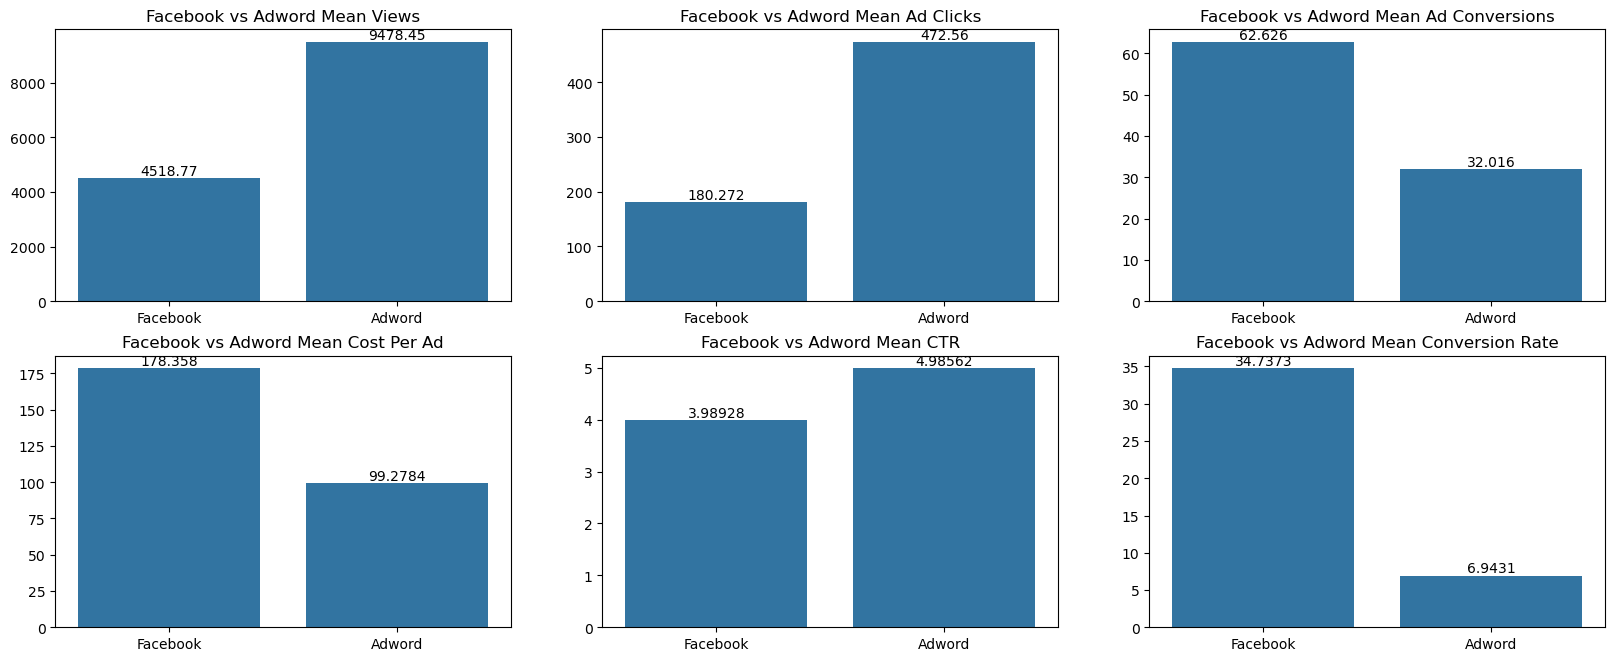

In [844]:
plt.figure(figsize=(20, 12))

# Subplot 1
plt.subplot(3, 3, 1)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_views"].mean(), df["adword_ad_views"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Views")

# Subplot 2
plt.subplot(3, 3, 2)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_clicks"].mean(), df["adword_ad_clicks"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Ad Clicks")

# Subplot 3
plt.subplot(3, 3, 3)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_conversions"].mean(), df["adword_ad_conversions"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Ad Conversions")

# Subplot 4
plt.subplot(3, 3, 4)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_cost_per_ad"].mean(), df["adword_cost_per_ad"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Cost Per Ad")

# Subplot 5
plt.subplot(3, 3, 5)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ctr"].mean(), df["adword_ctr"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean CTR")

# Subplot 6
plt.subplot(3, 3, 6)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_conversion_rate"].mean(), df["adword_conversion_rate"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Conversion Rate")

plt.show()


# (B)-ANalysing Total Views,Total click,Total conversion,Total cost per add, Total CTR, Total conversion rate beteen Facebook vs Adword

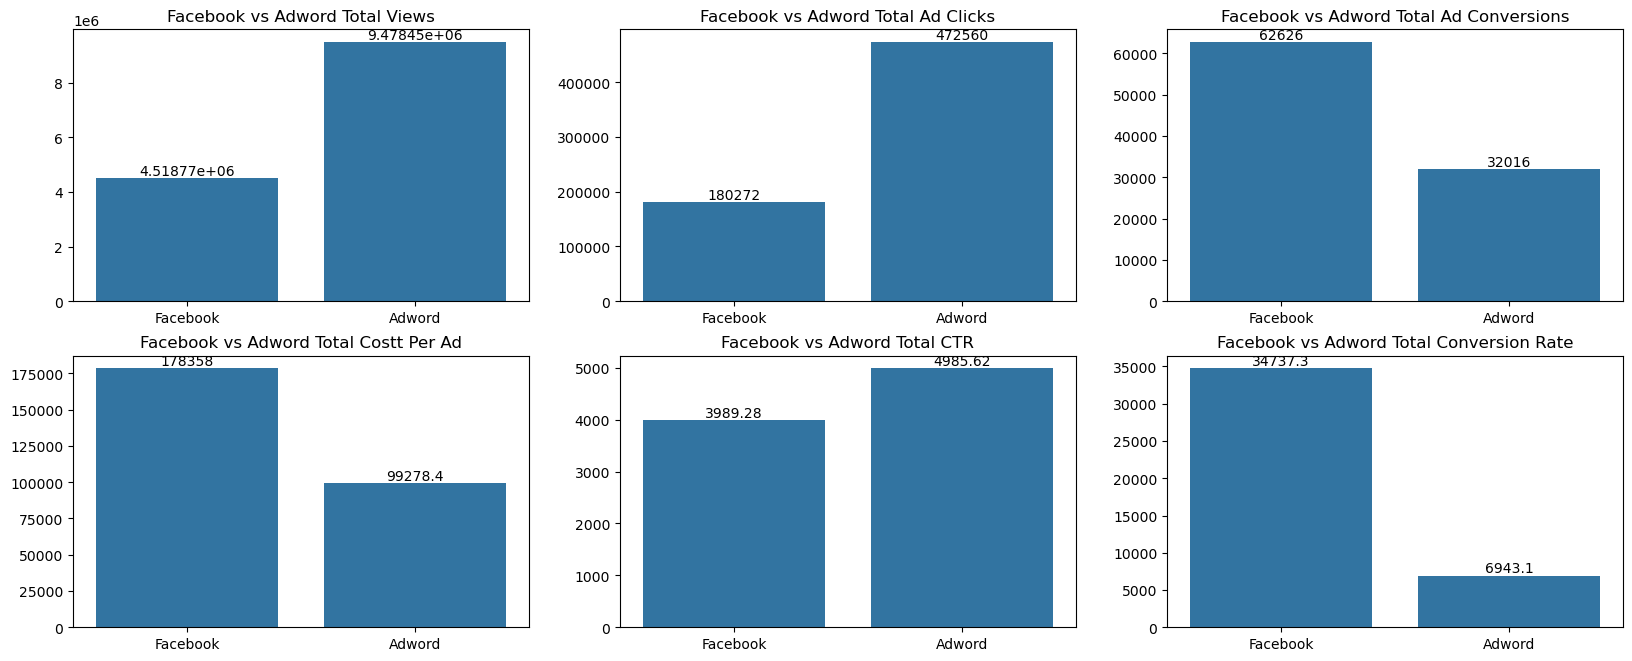

In [847]:
plt.figure(figsize=(20, 12))

# Subplot 1
plt.subplot(3, 3, 1)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_views"].sum(), df["adword_ad_views"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Views")

# Subplot 2
plt.subplot(3, 3, 2)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_clicks"].sum(), df["adword_ad_clicks"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Ad Clicks")

# Subplot 3
plt.subplot(3, 3, 3)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_conversions"].sum(), df["adword_ad_conversions"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Ad Conversions")

# Subplot 4
plt.subplot(3, 3, 4)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_cost_per_ad"].sum(), df["adword_cost_per_ad"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Costt Per Ad")

# Subplot 5
plt.subplot(3, 3, 5)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ctr"].sum(), df["adword_ctr"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total CTR")

# Subplot 6
plt.subplot(3, 3, 6)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_conversion_rate"].sum(), df["adword_conversion_rate"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Conversion Rate")

plt.show()


CPC for facebook is 2.8479829463800983
CPC for Adwords is 3.1009004872563715


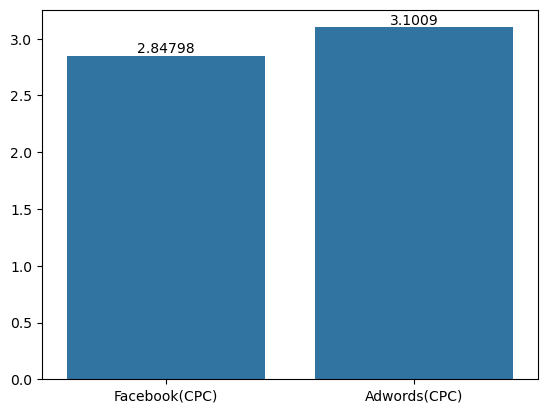

In [849]:
#Finding Cost per Conversion-How much money you're spending, on average, to acquire one conversion = cost_per_ad/conversions
ax = sns.barplot(x=["Facebook(CPC)","Adwords(CPC)"],y=[df["facebook_cost_per_ad"].sum()/df["facebook_ad_conversions"].sum(),df["adword_cost_per_ad"].sum()/df["adword_ad_conversions"].sum()])
ax.bar_label(ax.containers[0])


#df["facebook_Cost_per_conversion"]
print(f"CPC for facebook is {df["facebook_cost_per_ad"].sum()/df["facebook_ad_conversions"].sum()}")
print(f"CPC for Adwords is {df["adword_cost_per_ad"].sum()/df["adword_ad_conversions"].sum()}")

# Observations-:
1) From abive graph it is clearly visible that Adword Cost per Convertion is much more as compare to Facebook.Adword have 1.10 time more cost per conversion rate as comapre to Facebook
2) From this Observation we can figure out one thing that Facebook is outperforing the aDWORD BY good margin in case of conversions as well and in case of cost per each conversion so we will focus more and try to do hypothesis testing on facebook to see stastical sifnificance of it

# 4- Explanatory Data Anlaysis(EDA)
metrics - [clicks, Conversions and overall cost effectiveness[CPC]]

<Axes: xlabel='adword_ad_conversions', ylabel='Count'>

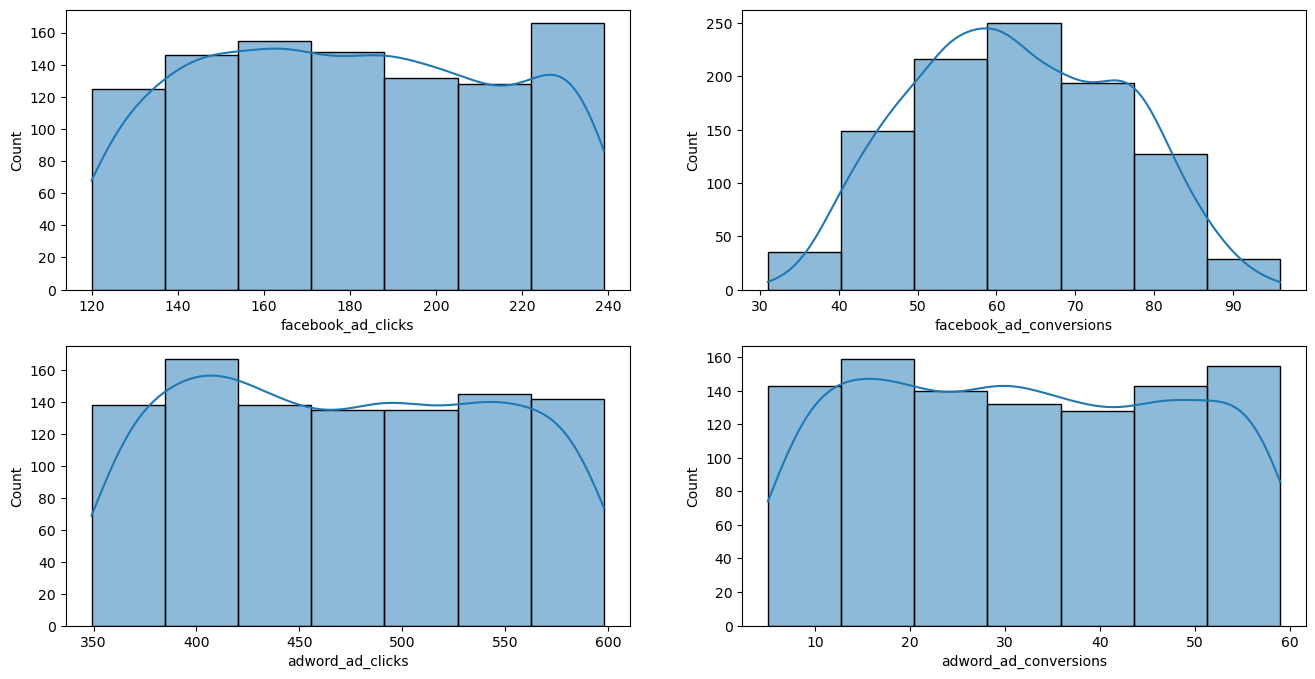

In [853]:
#Checking Distribution

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(x=df["facebook_ad_clicks"],label = "facebook clicks",bins=7,kde=True)
plt.subplot(2,2,2)
sns.histplot(x=df["facebook_ad_conversions"],label = "facebook ad_conversions",bins=7,kde=True)
plt.subplot(2,2,3)
sns.histplot(x=df["adword_ad_clicks"],label = "adword clicks",bins=7,kde=True)
plt.subplot(2,2,4)
sns.histplot(x=df["adword_ad_conversions"],label = "adwords ad_conversions",bins=7,kde=True)

#observations-:
1) From above kde/Histogram we can tell all of the graphs seems rougly and bell shaped but there can be a chances there distribution is not normal

2)- To further test the nomrlaity of data distibution we can use Shapiro-Test to check the Normality

# - Usinf Shapiro-Test to check Data Distribution
if p>0.05 = Then data is normally distributed
if p<0.05 then data is not normally distibuted

In [857]:
from scipy.stats import shapiro
stats,p = shapiro(df["facebook_ad_clicks"])
print(f"The p value of facebook_ad_clicks are {p}")
print('-'*50)

stats,p = shapiro(df["facebook_ad_conversions"])
print(f"The p value of facebook_ad_conversions are {p}")
print('-'*50)

stats,p = shapiro(df["adword_ad_clicks"])
print(f"The p value of adword_ad_clicks are {p}")
print('-'*50)

stats,p = shapiro(df["adword_ad_clicks"])
print(f"The p value of adword_ad_clicks are {p}")
print('-'*50)


#Since all values are <0.05 so all Features are normally Distributed



The p value of facebook_ad_clicks are 1.0990620023353509e-16
--------------------------------------------------
The p value of facebook_ad_conversions are 1.2133002091265265e-08
--------------------------------------------------
The p value of adword_ad_clicks are 1.7835820332534973e-17
--------------------------------------------------
The p value of adword_ad_clicks are 1.7835820332534973e-17
--------------------------------------------------


# - Checking Outliers

Text(0.5, 1.0, 'Boxplot of adword_ad_conversions')

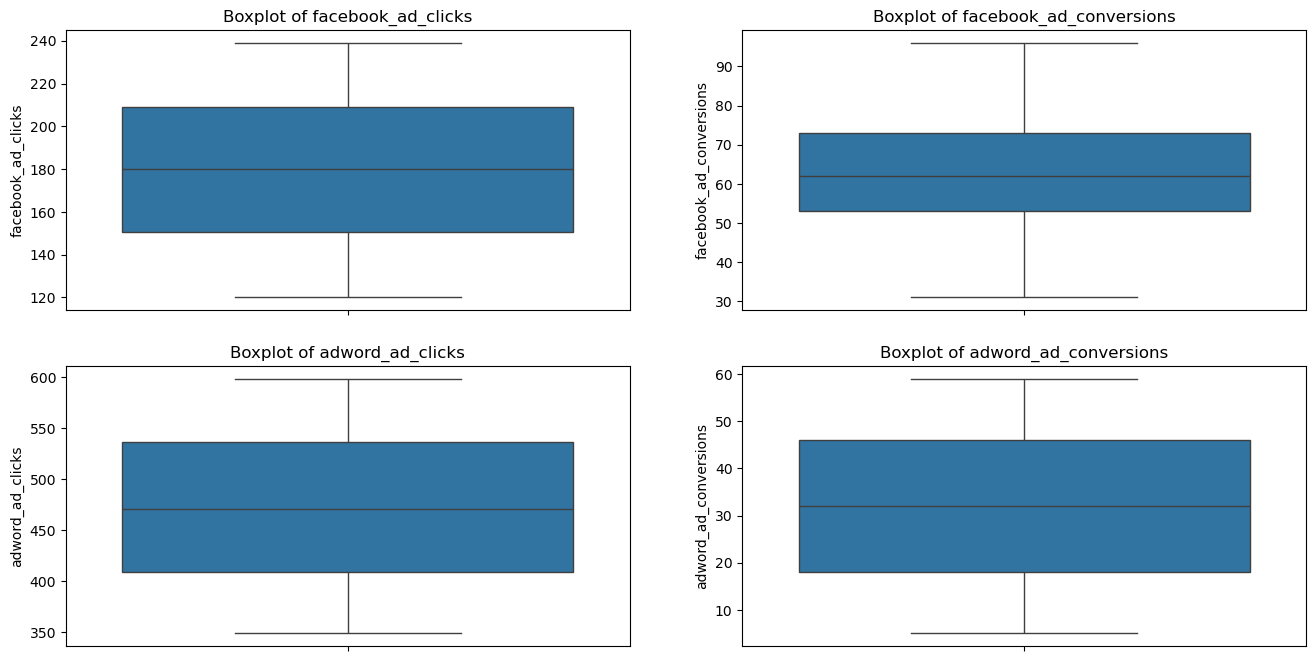

In [860]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df["facebook_ad_clicks"])
plt.title("Boxplot of facebook_ad_clicks")
plt.subplot(2,2,2)
sns.boxplot(df["facebook_ad_conversions"])
plt.title("Boxplot of facebook_ad_conversions")
plt.subplot(2,2,3)
sns.boxplot(df["adword_ad_clicks"])
plt.title("Boxplot of adword_ad_clicks")
plt.subplot(2,2,4)
sns.boxplot(df["adword_ad_conversions"])
plt.title("Boxplot of adword_ad_conversions")


# Question 1 - What is the frequency of High conversion Day as compare to Low conversion Days
#0-20 - Low Converion 
#20-40 - Medium Converison
#40-max - High Conversion

In [863]:
def conversion(value):
    values =[]
    for i in value:
        if i<20:
            values.append("Low Conversion")
        elif 20<=i<=40:
            values.append("Medium Conversion")
        else:
           values.append("High Conversion")
    return values

df["f_converion"] = conversion(df["facebook_ad_conversions"])
df["AD_conversion"] = conversion(df["adword_ad_conversions"])
        
    

<Figure size 1600x800 with 0 Axes>

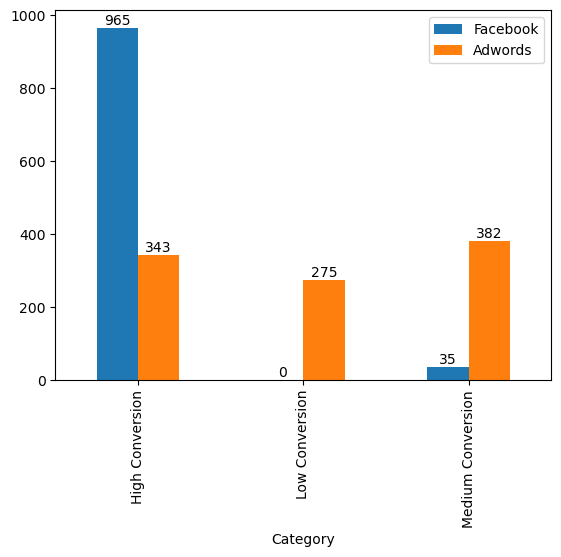

In [865]:
f_freq = pd.DataFrame(df["f_converion"].value_counts()).reset_index().rename(columns={"f_converion":"Category"})
A_freq = pd.DataFrame(df["AD_conversion"].value_counts()).reset_index().rename(columns={"AD_conversion":"Category"})
df_freq = pd.merge(f_freq,A_freq,on="Category",how="outer").fillna(0)
df_freq.rename(columns={"count_x":"Facebook","count_y":"Adwords"},inplace=True)




plt.figure(figsize=(16,8))
ax = df_freq.set_index("Category").plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#Observation-:

1-Conversion Distribution Dominance
From the graph, it’s evident that while both AdWords and Facebook generate conversions across 1000 ad campaigns, Facebook significantly outperforms AdWords.
Facebook consistently produces more than 40 conversions per ad in almost 96% of the cases, showing a strong and consistent high-performance pattern.
Notably, Facebook has no instances of conversions under 20, indicating minimal low-performing ads on the platform.


2-AdWords Performance is Mixed
In contrast, AdWords shows a more balanced but average conversion profile:
Many ads fall into the medium conversion range (~382 ads).
AdWords also has a non-negligible portion of low and high conversions, reflecting variability and less reliability in performance.


3-Early Conclusion
Based on this visual and statistical distribution, Facebook clearly has a stronger conversion engine than AdWords. However, before drawing a final business decision…

4-Next Step: Hypothesis Testing
We will now perform A/B hypothesis testing to determine whether Facebook’s better performance is statistically significant, or if the observed difference could have occurred by chance (e.g., due to sampling variation or bias).

# Question 2 - Does No of Clicks really affecting Conversion (does it leading to Conversion if someone clickign on AD)?


<Axes: title={'center': 'Adwords Click and Conversions'}, xlabel='adword_ad_clicks', ylabel='adword_ad_conversions'>

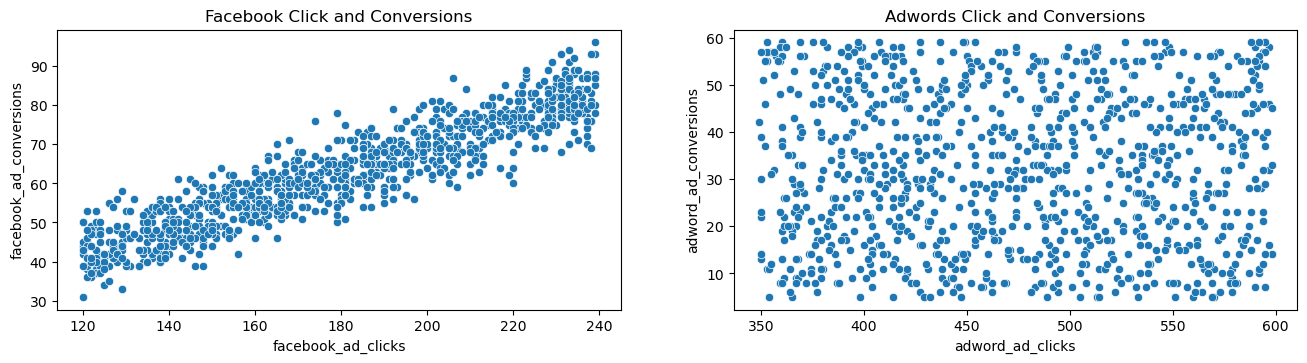

In [869]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.title("Facebook Click and Conversions")
sns.scatterplot(x=df["facebook_ad_clicks"],y=df["facebook_ad_conversions"])
plt.subplot(2,2,2)
plt.title("Adwords Click and Conversions")
sns.scatterplot(x=df["adword_ad_clicks"],y=df["adword_ad_conversions"])

Text(0.5, 1.0, 'Facebook vs Adword Total Ad Conversions')

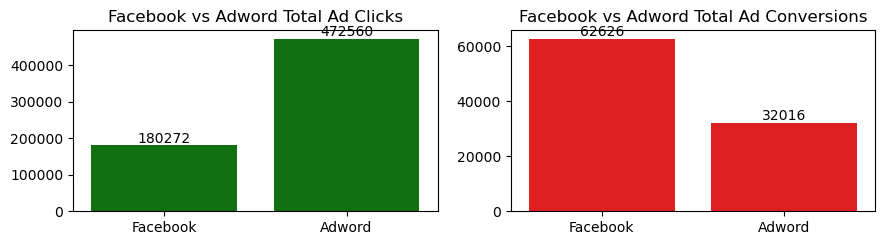

In [871]:
plt.figure(figsize=(16,8))
plt.subplot(3, 3, 1)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_clicks"].sum(), df["adword_ad_clicks"].sum()],color="green")
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Ad Clicks")

plt.subplot(3, 3, 2)
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_conversions"].sum(), df["adword_ad_conversions"].sum()],color="red")
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Ad Conversions")


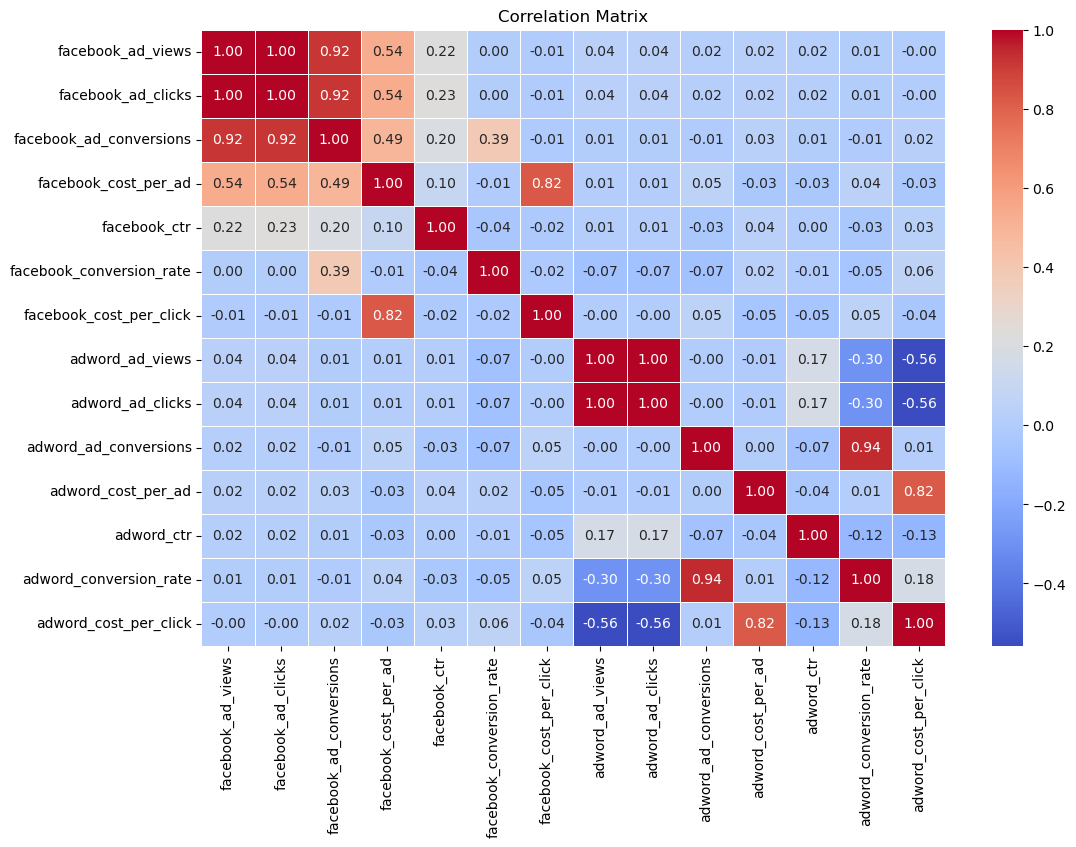

In [873]:

df_new=df.copy()
df_new.drop(["date","f_converion","AD_conversion"],axis=1,inplace=True)
df_new.corr()


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Clicks vs. Conversions Relationship

The correlation between clicks and conversions is:

Facebook Ads: 0.92 → Strong linear relationship

AdWords: -0.01 → Weak relationship

This indicates that clicks on Facebook ads are more predictive of conversions, suggesting a highly optimized conversion funnel.
Discrepancy Despite Higher Clicks

Although AdWords generates more clicks, the actual conversion is bit lower than Facebook.
This is visually apparent in the graphs above, where AdWords click numbers are high, but conversion outcomes are underwhelming.


# Interpretation: Audience & Format Advantage

This gap suggests that Facebook ads may be reaching more qualified or better-targeted audiences, or:
Facebook's ad formats (videos, carousels) could be more engaging, driving higher post-click conversion rates.
Facebook’s platform possibly enables more granular interest-based targeting.


# Summary:
Even though AdWords drives reach and clicks at scale, Facebook's ability to convert is more efficient — likely due to better targeting, visual content, and user-platform trust.

# Question 3 - Where Return to Investment Will be Higher in Adword or Facebook?
Metrics for R0I

1 - Better CPC(Cost per Conversion)

2 - Better CTR(Click Thorugh Rate(there can be chances we can fix things in ad to increae conversion since we already gonna have more clicks and views based on CTR)

3- Better Converison Rate

Text(0.5, 1.0, 'Facebook vs Adword Total Views')

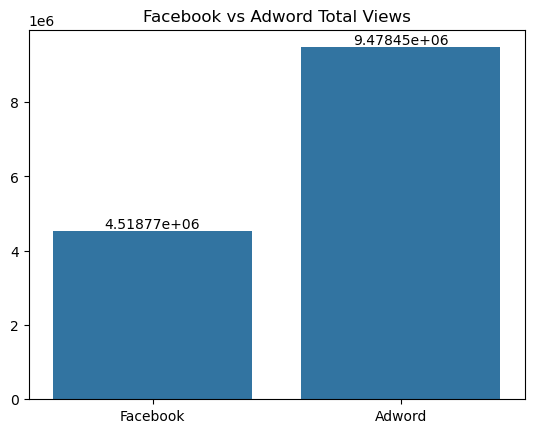

In [877]:

ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_views"].sum(), df["adword_ad_views"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Views")


CPC for facebook is 2.8479829463800983
CPC for Adwords is 3.1009004872563715


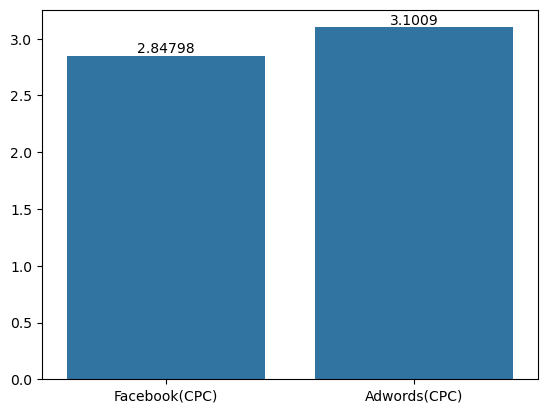

In [879]:
#Finding Cost per Conversion-How much money you're spending, on average, to acquire one conversion = cost_per_ad/conversions
ax = sns.barplot(x=["Facebook(CPC)","Adwords(CPC)"],y=[df["facebook_cost_per_ad"].sum()/df["facebook_ad_conversions"].sum(),df["adword_cost_per_ad"].sum()/df["adword_ad_conversions"].sum()])
ax.bar_label(ax.containers[0])


#df["facebook_Cost_per_conversion"]
print(f"CPC for facebook is {df["facebook_cost_per_ad"].sum()/df["facebook_ad_conversions"].sum()}")
print(f"CPC for Adwords is {df["adword_cost_per_ad"].sum()/df["adword_ad_conversions"].sum()}")

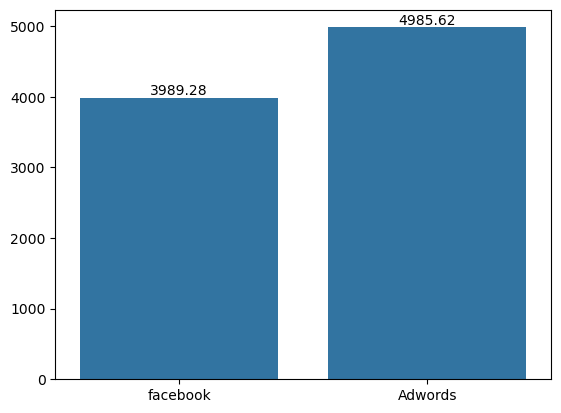

In [881]:
ax = sns.barplot(x=["facebook","Adwords"],y=[df["facebook_ctr"].sum(),df["adword_ctr"].sum()])
for container in ax.containers:
    ax.bar_label(container)

Text(0.5, 1.0, 'Facebook vs Adword Total Conversion Rate')

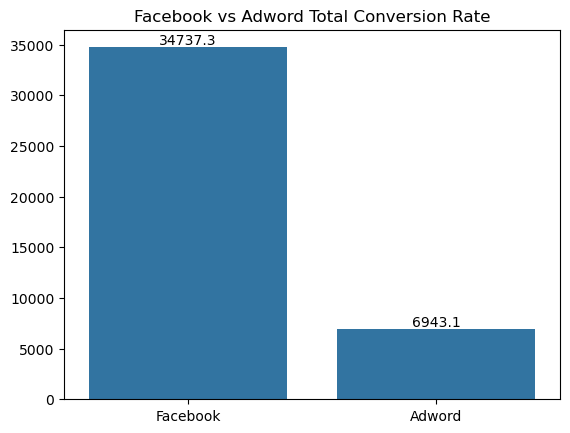

In [883]:
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_conversion_rate"].sum(), df["adword_conversion_rate"].sum()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Total Conversion Rate")

 Observation-:
1) CPC - Facebook have better cost per conversion as comapre to Adwords

2) CTR - Adword have better click through rate as compare to Facebook

3)- Conversion Rate - Facebook have better conversion rate as comapre to Adwords


Thus it shows facebook is performing much better in term of converting the clicks into conversion meand have higher conversion rate and apart from that it is also have lowercost of converion per ad thus making it better and cost effective as well saving more money and giving better conversions.

So we will do Hypothesis testing(A/B) to see if Facebook really performing well or it is just having hight numbers due to randomness or by luck.

# 5- Hypothesis Testing(A/B testing)
A/B testing is a controlled experimental test where we used to split data or user into 2 groups to test ro test different verson of variable and to figure out their stastical significance
Grouop A- controlled group with no chance(Original group)
Group B - Experimental group with some changes .Used to compare with group A to test how well the changes are performing

#so we will take out hypothesis based on what we just discovered that facebook is performing better than Adwords

Hythothesis: The facebook ads are perfoming much better than ADwords ad in Conversion or cnverting user view into result such as in signups or buyin clothes

Null Hypothesis(H0) - There is no significant different in the conversion of Facebook AD and ADwords Ads(u0Facebook<=U0Adwords)

Alternative Hypothesis(H1)- The conversion of FacebookAD is much more than ADwordsAD (u0Facebook>U0Adwords)


# T-Test – Explanation & Justification
A t-test is a statistical test used to compare the means of two groups and determine whether the observed difference is statistically significant or could have occurred by chance.

1-Why Use a T-Test in This Case?
We want to compare the mean conversions between Facebook and AdWords.

2-Appropriate because:

We're comparing two independent groups (Facebook vs AdWords).
The column (conversions) is numerical.
The dataset contains individual ad-level data, not pre-aggregated averages — so we can run a valid statistical test on each group.probem we would have used z-test to compare proportions

In [888]:
from scipy.stats import ttest_ind

stats,p= ttest_ind(df["facebook_ad_conversions"],df["adword_ad_conversions"])
print(stats)
print(p)
if p<0.05:
        print("We will ignore the null hypothesis. We have enough evidence to conclude that facebook ads conversion is much more than Adwords")
else:
    print("we fail to reject null hypothesis")

46.750831770609636
6e-323
We will ignore the null hypothesis. We have enough evidence to conclude that facebook ads conversion is much more than Adwords


Text(0.5, 1.0, 'Facebook vs Adword Mean Ad Conversions')

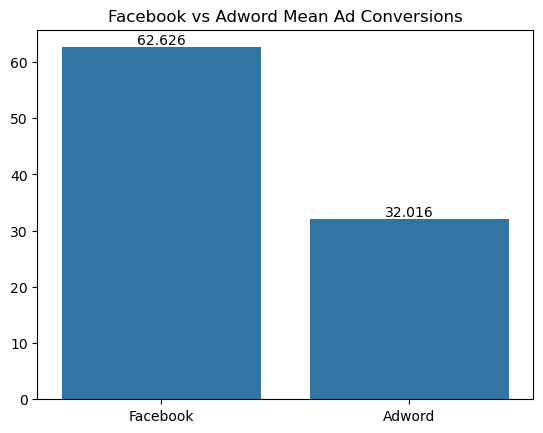

In [890]:
ax = sns.barplot(x=["Facebook", "Adword"], y=[df["facebook_ad_conversions"].mean(), df["adword_ad_conversions"].mean()])
ax.bar_label(ax.containers[0])
plt.title("Facebook vs Adword Mean Ad Conversions")

# Observation & Conclusion from Hypothesis Testing:
1. Conversion Rate Comparison:

The mean conversion rate for Facebook ads is 62.34 per ad, while for AdWords, it is 31.67 per ad.
This clearly indicates that Facebook ads are more effective at converting users into customers or members compared to AdWords.

2. Hypothesis Testing Results:
(A) t-statistic:

The computed t-statistic is around 66, which is a very large value.

This implies a substantial difference in mean conversion rates between Facebook and AdWords, far beyond what we'd expect by random chance.

(B) p-value:

The p-value is extremely small (≪ 0.05), which means:

There is strong statistical evidence to reject the null hypothesis (which assumes both platforms have equal conversion rates).

#Conclusion:
Based on the statistical analysis:

Facebook's higher average conversion rate is not due to chance — it's statistically significant.
This suggests that Facebook ads are performing significantly better in terms of driving conversions than AdWords.



#Recommendation:
Given these results, it would be wise to:

Reallocate more ad budget toward Facebook, as it's yielding better conversion efficiency.
Continue experimenting with different ad formats, creatives, and targeting strategies within Facebook to further optimize performance.
Review and refine the AdWords strategy — instead of increasing spend blindly, investigate why its conversion rate is lower (e.g., poor targeting, ineffective landing pages, weak ad design).


Since Facebook outperforms AdWords in conversion rates, it is recommended to prioritize Facebook for ad spend to achieve a better Return on Investment (ROI).
                                                                                                



# 6 - Forecasting the Facebook Conversion for Next Year

# 1 - Importing Libraries

In [675]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet     #Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from xgboost import XGBRegressor
df

,date,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click,f_converion,AD_conversion
0,2022-01-01,3860,154,62,212.52,3.99,40.26,1.38,10123,505,5,66.94,4.99,0.99,0.13,High Conversion,Low Conversion
1,2022-01-02,4294,171,64,181.26,3.98,37.43,1.06,7897,394,40,86.96,4.99,10.15,0.22,High Conversion,Medium Conversion
2,2022-01-03,4130,165,59,219.45,4.00,35.76,1.33,11876,592,10,70.32,4.98,1.69,0.12,High Conversion,Low Conversion
3,2022-01-04,4095,163,53,197.23,3.98,32.52,1.21,7225,360,13,101.85,4.98,3.61,0.28,High Conversion,Low Conversion
4,2022-01-05,4638,185,60,222.00,3.99,32.43,1.20,8209,409,46,110.64,4.98,11.25,0.27,High Conversion,High Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-22,4629,185,67,112.85,4.00,36.22,0.61,8947,446,24,84.06,4.98,5.38,0.19,High Conversion,Medium Conversion
996,2024-09-23,5551,222,83,237.54,4.00,37.39,1.07,8308,414,54,77.96,4.98,13.04,0.19,High Conversion,High Conversion
997,2024-09-24,5021,200,72,216.00,3.98,36.00,1.08,9986,498,44,104.16,4.99,8.84,0.21,High Conversion,High Conversion
998,2024-09-25,3946,157,58,189.97,3.98,36.94,1.21,7386,368,22,88.59,4.98,5.98,0.24,High Conversion,Medium Conversion


# 2- Loading the Dataset

In [678]:

df_forecast = df[["date","facebook_ad_conversions","facebook_ad_clicks","facebook_ad_views"]]
df_forecast["date"]= pd.to_datetime(df_forecast["date"])
df_forecast.head(20)
df_forecast.set_index("date",inplace=True)

# 3 - Checking Seasonality of Data

In [681]:
df_forecast["month"] = df_forecast.index.month
df_forecast["day"] = df_forecast.index.day
df_forecast["week"] = df_forecast.index.dayofweek

<Axes: xlabel='day'>

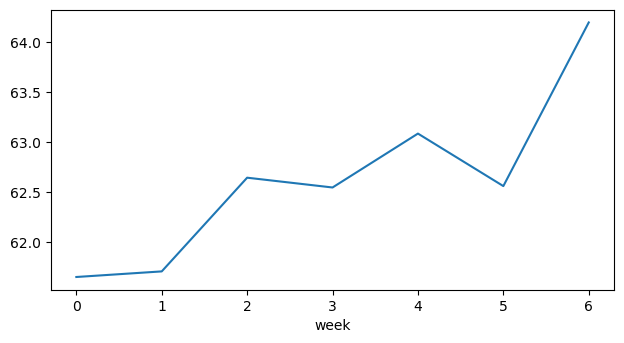

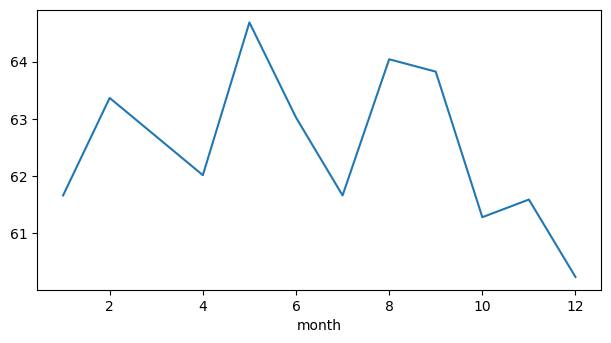

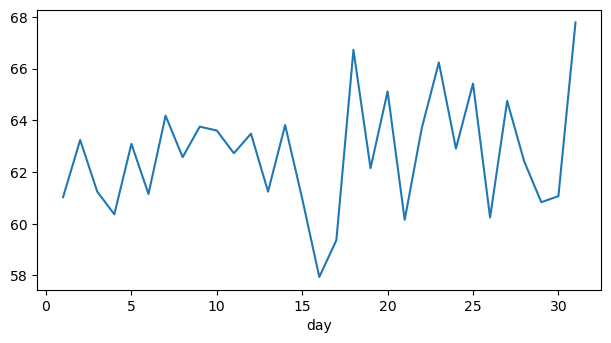

In [683]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
df_forecast.groupby("week")["facebook_ad_conversions"].mean().plot(kind="line",label="Weekly Facebook Coversion")
plt.figure(figsize=(16,8))
plt.subplot(2,2,2)
df_forecast.groupby("month")["facebook_ad_conversions"].mean().plot(kind="line",label="Monthly Facebook Coversion")
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
df_forecast.groupby("day")["facebook_ad_conversions"].mean().plot(kind="line",label="Daily Facebook Coversion")

# Observation-:

1)-Weekly Seasonality:
Facebook conversions tend to peak early in the week, particularly on Mondays and Tuesdays, and then gradually decline toward the weekend.
    
2)-Monthly Seasonality:
There is noticeable monthly fluctuation, with conversion rates peaking around April and May, indicating a strong Q2 performance.

    
3)-Hourly Seasonality:
Conversions start relatively low in the early morning and reach a daily peak around 11 AM to 12 PM, then maintain a moderate level throughout the rest of the day.



# To maximize conversions, consider:
                                                                                                
Scheduling ads on Mondays and Tuesdays
                                                                                                
Targeting hours between 8 AM and 1 PM
                                                                                                
Focusing campaigns in Q2 (especially April and May) when conversion rates are highest


# 4 - Checking Stationarity of dataset using Dickey Fuller Test

In [687]:
#H0 - The data is not stationary
#H1 - The data is stationary
from statsmodels.tsa.stattools import adfuller
def stationary(value):
    results=[]
    result = adfuller(value)
    labels = ["ADB statistics","p-value","Lags","No of observations","c interval"]
    for i,label in zip(result,labels):
          print(label,':',i)
          results.append([label,':',i])
    if result[1]<0.05:
        print("We rejecting the null hypothesis since we have enough evidence to reject it. Means data is stationary")
    else:
        print("Data is not stationary")
stationary(df_forecast["facebook_ad_conversions"])
    

ADB statistics : -21.388735708806117
p-value : 0.0
Lags : 1
No of observations : 998
c interval : {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
We rejecting the null hypothesis since we have enough evidence to reject it. Means data is stationary


#Observations-:
1) From above test we can clearly see The data is stationary so now we can move further to build our model for forecasting

2) Now there are some Model which can work pretty good with kind of Data like-:

(a)-ARIMA(Autoregressive integrated moving averages) - This is a time series model used in forecasting time related data when the data is stationary,univariate, and non-seasonal.Since our data have some seasonality so we will not use this for forecasting in this context.

(b) - SARIMAX(Seasonal ARIMA)  -This is another time series model build over ARIMA but with some additional feature of handling seasonality in dataset.This model work best when data is stationary,seasonal, and univariate.So we will use this Model for our forecasting.

(c) - Prophet - It is another time series model designed by facebook used for time series forecasting based on additive model for easy and accurate prediction/forecasting.It is best used when there is multiple seasonality in dataset(like weekly,monthly,daily) and used when there is irregularity in time interval in dataset.We will prioritise this model more since we have multiple seasonality and some irregularities in our dataset as well

(d) we will try to use both SARIMAX AND prophet and try to compare prediction of both the model so we can use the best model and forecast the facebook ad conversion for Next year

(e) LSTM - If None of above model works than we will try a Deep learning model known as LSTM which is specifically designed to learn complex patters over non linear data.



An SARIMAX model is characterized by 3 terms: p, d, q

p is the order of the AR term (number of lags of Y to be used as predictors or no of next months or years we wanna predict). q is the order of the MA term (moving average). d is the number of differencing required to make the time series stationary. In our case, since the series are already stationary, d=0 for both series. q is the order of MA term(Moving average) tells how many past errors to use to improve prediction We need to determine the optimal values for p and q. To do this, we'll look at the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

# 5 -Plotting ACF(Anti correlation function) and PACF(Partial Anti Correlation function) to get p,q values for Sarimax model

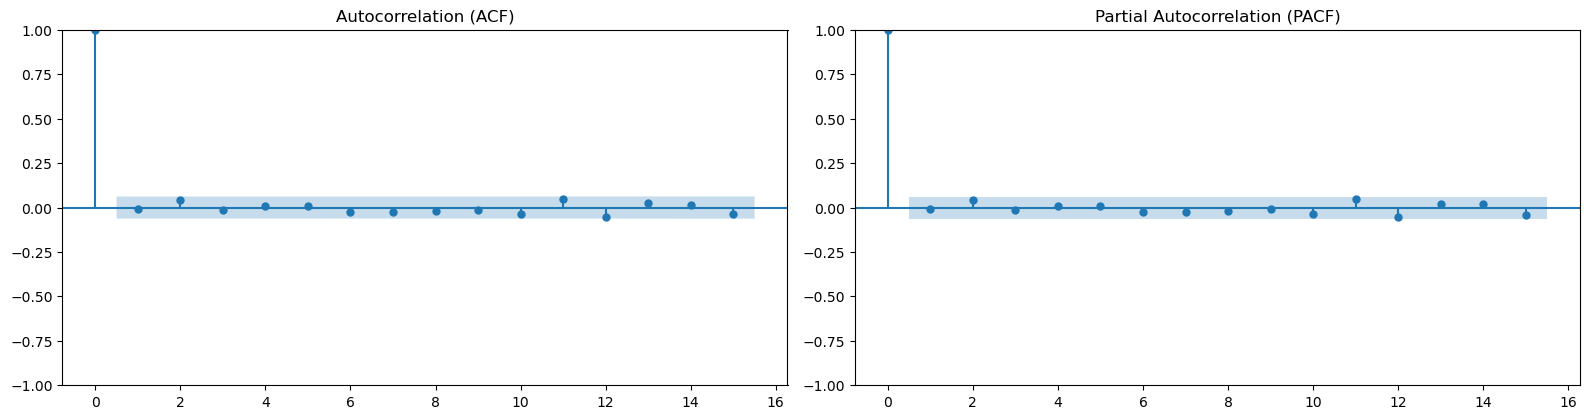

In [691]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# ACF plot
plt.subplot(2, 2, 1)
plot_acf(df_forecast["facebook_ad_conversions"], lags=15, ax=plt.gca())
plt.title("Autocorrelation (ACF)")

# PACF plot
plt.subplot(2, 2, 2)
plot_pacf(df_forecast["facebook_ad_conversions"], lags=15, ax=plt.gca(), method='ywm')  # more stable method
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()


# 6- Training and Evaluating Sarimax Model

In [694]:
# Since IN (ACF) WE See that bar is exponentially decreasing at x=1 so we will try to test it with q=1(MA term)
# Since in (PACF) we see the bar is suddenly shutting off ar x=2 so we willl try to test it with p=2(AR term)

df_forecast.reset_index(inplace=True)


df_new  = df_forecast[["date","facebook_ad_conversions"]]
df_new.rename(columns={"date":"ds","facebook_ad_conversions":"y"},inplace=True)
df_new.set_index('ds', inplace=True)



from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
df_new["y_scaled"] = scaler1.fit_transform(df_new[["y"]])
df_new.drop("y",axis=1,inplace=True)

In [696]:
# Normalising the values using log1p mean making all values between 0 and 1
# Standdardising all values with mean=0 and std=1

split_size = int(len(df_new["y_scaled"])*0.80)
df_train = df_new[:split_size]
df_test= df_new[split_size:]

df_test.describe()



from statsmodels.tsa.statespace.sarimax import SARIMAX

model1 = SARIMAX(df_train,order = (2,0,1),seasonal_order = (2,0,1,7))   #s=24 means data is monthly after resampled and seasonaly are more monthly
model_fit = model1.fit(disp=False)



y_pred = model_fit.predict(start=len(df_train), end=len(df_train) + len(df_test) - 1)
y_true = df_test.values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.4f}")
print(f"std:{df_new["y_scaled"].describe()}")

RMSE: 1.0912
std:count    1.000000e+03
mean     1.643130e-16
std      1.000500e+00
min     -2.411964e+00
25%     -7.341290e-01
50%     -4.774203e-02
75%      7.911754e-01
max      2.545276e+00
Name: y_scaled, dtype: float64


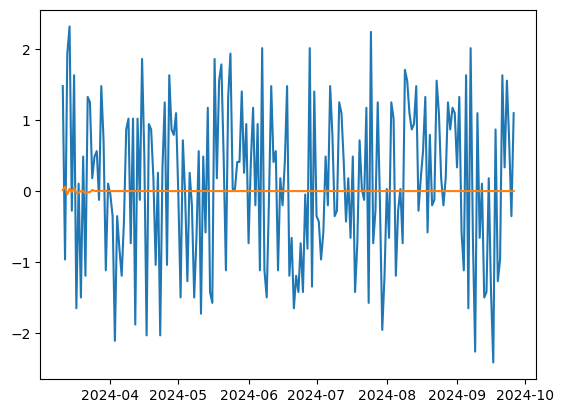

In [698]:
plt.plot(df_test.index,df_test)
plt.plot(df_test.index,y_pred)

# Observations
1-The trained model yielded an RMSE of 1.032 which is not satisfactory.

2-The standard deviation of the target variable (facebook_ad_conversions) is 1.000, which is nearly equal to the RMSE.

3-This suggests that the model is not learning meaningful patterns from the data.
Essentially, the model’s performance is no better than random prediction.
    
# Possible Reason for Poor Performance
1-The dataset may exhibit complex patterns, such as:

Multiple seasonalities (e.g., daily, weekly, and monthly trends)

Non-linearity in relationships between features and the target

Traditional regression models often fail to capture such intricate dependencies, leading to poor performance.
    
# Proposed Solutions
1-Use Facebook Prophet

Specifically designed for time series with multiple seasonality components (daily, weekly, yearly).

Handles missing data and outliers more robustly than traditional models.

# 7 -Training and Evaluating Using Prophet Model


In [700]:
from prophet import Prophet
df_forecast = df[["date","facebook_ad_conversions","facebook_ad_clicks"]]
df_forecast["date"]= pd.to_datetime(df_forecast["date"])
df_forecast
df_forecast.rename({"date":"ds","facebook_ad_conversions":"y"},axis=1,inplace=True)


split_window = int(len(df_forecast)*0.80)
df_train = df_forecast[:split_window]
df_test = df_forecast[split_window:]



In [706]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train model
model2 = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
model2.add_regressor('facebook_ad_clicks')

model2.fit(df_train)

future = df_test[['ds', 'facebook_ad_clicks']].copy()
forecast = model2.predict(future)
print(np.sqrt(mean_squared_error(df_test["y"],forecast["yhat"])))
print(f"Accuracy:{r2_score(df_test["y"],forecast["yhat"])*100}")


12:33:25 - cmdstanpy - INFO - Chain [1] start processing
12:33:25 - cmdstanpy - INFO - Chain [1] done processing


5.265775708934079
Accuracy:86.35641810538803


# 8- Forecasting Next Year Using Prophet

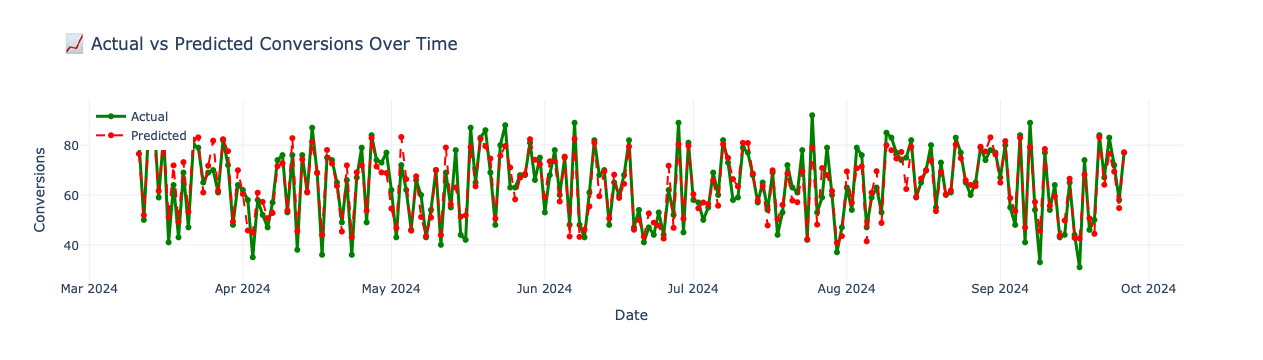

In [709]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(x=df_test['ds'], y=df_test['y'],
                         mode='lines+markers',
                         name='Actual',
                         line=dict(color='green', width=3)))

# Predicted values
fig.add_trace(go.Scatter(x=df_test['ds'], y=forecast['yhat'],
                         mode='lines+markers',
                         name='Predicted',
                         line=dict(color='red', dash='dash')))

# Layout
fig.update_layout(title='📈 Actual vs Predicted Conversions Over Time',
                  xaxis_title='Date',
                  yaxis_title='Conversions',
                  template='plotly_white',
                  legend=dict(x=0.01, y=0.99),
                  hovermode='x unified')

fig.show()


In [711]:
future_dates = pd.date_range(start = df_test["ds"].iloc[-1]+pd.Timedelta(days=1),periods = 365,freq="D")
future= future_clicks[-365:]
df_new = pd.DataFrame({"ds":future_dates,"facebook_ad_clicks":future})
forecast_365 = model2.predict(df_new)

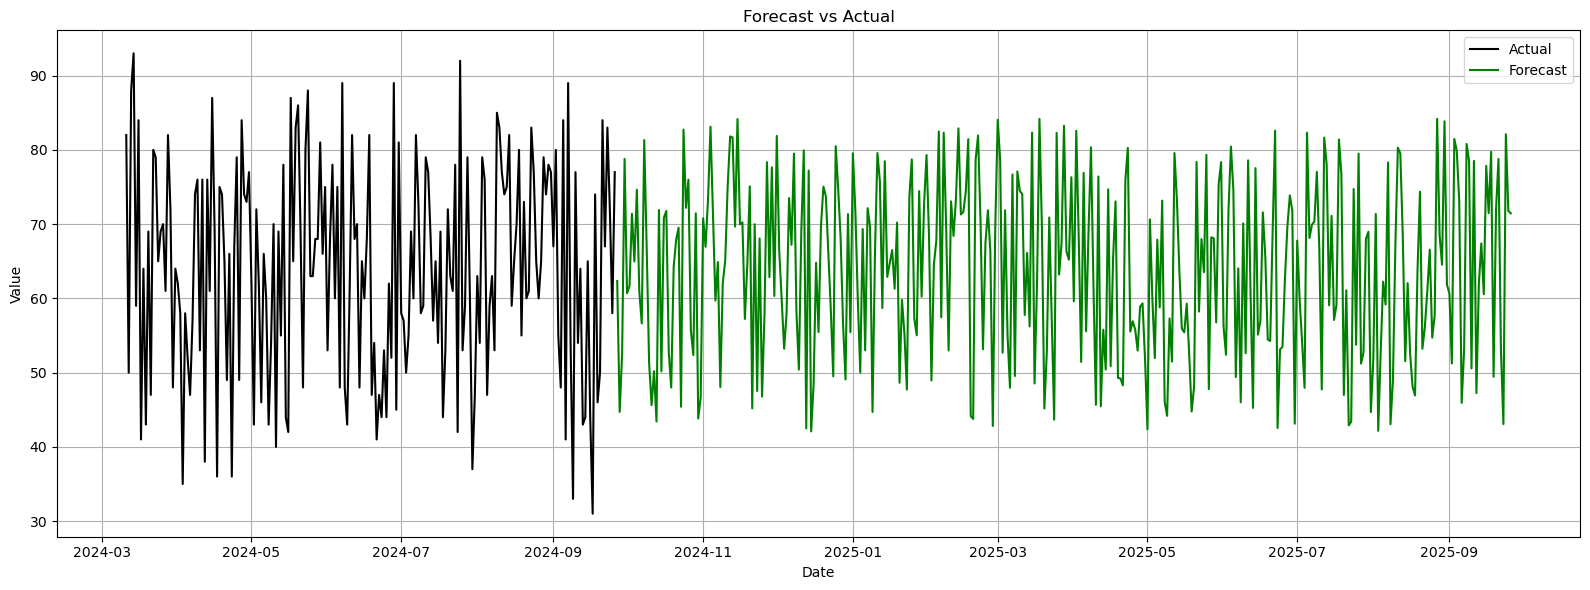

In [713]:
plt.figure(figsize=(16, 6))

# Actual historical values
plt.plot(df_test['ds'], df_test['y'], label='Actual', color='black')

# Forecasted values
plt.plot(forecast_365['ds'], forecast_365['yhat'], label='Forecast', color='green')


# Final plot touches
plt.legend()
plt.title("Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

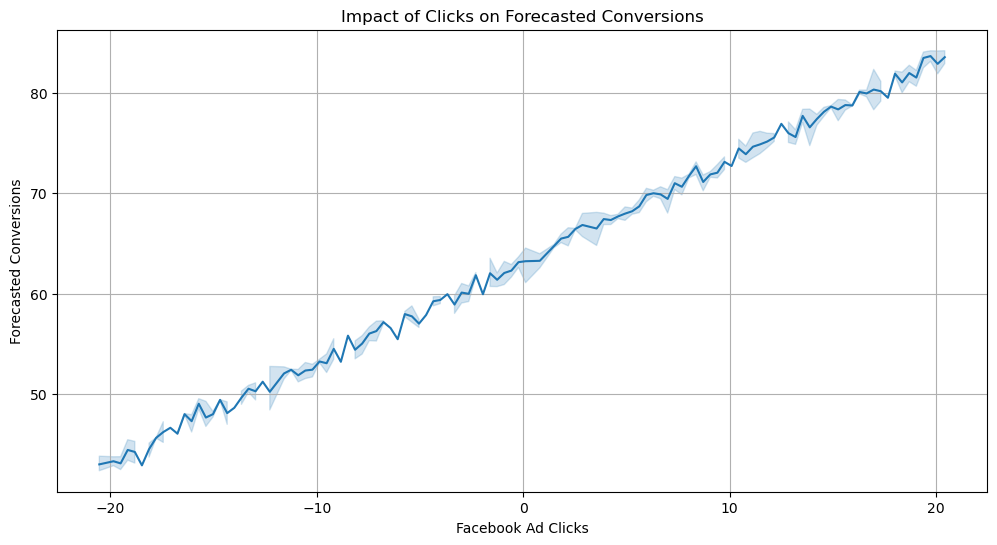

In [715]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=forecast_365['facebook_ad_clicks'], y=forecast_365['yhat'])
plt.xlabel("Facebook Ad Clicks")
plt.ylabel("Forecasted Conversions")
plt.title("Impact of Clicks on Forecasted Conversions")
plt.grid(True)
plt.show()


# Observation:

Based on the forecasted trend using expected future facebook_ad_clicks, we can conclude that Facebook conversions are 
likely to remain consistent over the next 365 days if engagement levels remain stable.

The predicted range of conversions lies between approximately 45 and 80 conversions per ad, indicating solid performance.

If the number of ad clicks increases in the future, we can reasonably expect a proportional increase in Facebook ad conversions, based on the current model.



# Suggestion:

Invest more in Facebook advertising, as the forecast shows strong and stable performance, assuming interaction levels remain the same.

To further improve conversions:

Enhance ad quality and creative content to attract more clicks.

Refine audience targeting strategies to increase click-through rates.

Focus on increasing engagement (clicks and views) since the model clearly shows that more clicks correlate with higher conversions — potentially surpassing 80 conversions per campaign.

# 9 - Regression Analysis

# Question - What will happen when I do go with facebook AD? How many Facebook Converson I can expect given certain number of Click?

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df.dropna(inplace=True)

# Features and target
X = df[["facebook_ad_clicks"]]
y = df["facebook_ad_conversions"]

# Scale features
scaler4 = StandardScaler()
X_scaled = scaler4.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


LinearRegression - RMSE: 5.46, MAE: 4.43, R²: 0.83
RandomForest - RMSE: 5.88, MAE: 4.73, R²: 0.81
XGBoost - RMSE: 5.91, MAE: 4.74, R²: 0.80


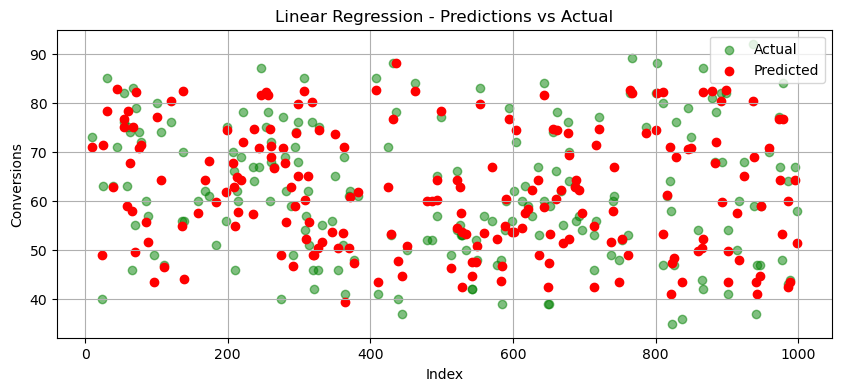

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot actual vs predicted
plt.scatter(y_test.index, y_test, alpha=0.5, color="green", label="Actual")
plt.scatter(y_test.index, y_pred, color="red", label="Predicted")

plt.xlabel("Index")
plt.ylabel("Conversions")
plt.title(f"Linear Regression - Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [25]:
input_1 = [[100]]
input_2 = [[30000]]

scaled_1 = scaler4.transform(input_1)
scaled_2 = scaler4.transform(input_2)

# Use the correct key for the model from your dictionary
print(f"for {input_1[0]} clicks = {models['LinearRegression'].predict(scaled_1)} conversions")
print(f"for {input_2[0]} clicks = {models['LinearRegression'].predict(scaled_2)} conversions")


for [100] clicks = [34.5403185] conversions
for [30000] clicks = [10506.88401845] conversions


# 10- Saving Model for Streamlit Hosting

In [27]:
import pickle
pickle.dump(model,open("modelfinal.pkl","wb"))
pickle.dump(scaler4,open("scalerfinal.pkl","wb"))

# Observations

1-Click-Conversion Relationship Is Strongly Linear:
Among all tested models, Linear Regression delivered the highest accuracy (~83%), indicating a strong linear relationship between the number of Facebook ad clicks and conversions. This suggests a consistent conversion funnel where more clicks reliably lead to more conversions.

2-Positive Marketing Impact Evident:
The data shows a clear trend: as the number of clicks increases, conversions also rise proportionally. For instance, approximately 100 clicks are generating around 35 conversions, reflecting a good conversion rate (~35%). This implies that the ad creatives or templates in use are effective and persuasive, engaging users both before and after clicking.


3--Forecasting with Prophet Shows Seasonal Stability but Limited Growth:

The Prophet model, even when extended for 365 days, predicted fairly stable and cyclical future conversions. However, its baseline predictions remained relatively flat. This is likely because future regressor inputs (clicks/views) were assumed constant. Without dynamic ad activity, the model could not forecast aggressive growth.

4--External Regressors Matter for Forecasting Accuracy:

The use of facebook_ad_clicks and facebook_ad_views as external regressors significantly improved forecasting realism. It reinforces the idea that ad engagement metrics are crucial predictors of future conversion behavior.





# 10 -Conclusion
The analysis clearly demonstrates that Facebook ad clicks have a direct and strong impact on conversions, validating the effectiveness of the current ad format or targeting strategy. Linear Regression emerges as the most interpretable and accurate model with metrics as -:

1- Accuracy-85%

2 - MAE (mean absolute error)- 4.90

3- MSE(mean squared error) - 3.86

Thus making it a practical choice for campaign performance prediction.

While Prophet forecasting helps visualize long-term trends, its usefulness is limited unless supported by realistic future ad engagement projections. For more actionable forecasting, it's crucial to model expected growth or seasonality in clicks and views.

Overall, the findings support continued investment in Facebook ads — especially if the click volume can be increased without sacrificing quality — as the current conversion efficiency is already quite promising.

In [736]:
df

,date,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click,f_converion,AD_conversion
0,2022-01-01,3860,154,62,212.52,3.99,40.26,1.38,10123,505,5,66.94,4.99,0.99,0.13,High Conversion,Low Conversion
1,2022-01-02,4294,171,64,181.26,3.98,37.43,1.06,7897,394,40,86.96,4.99,10.15,0.22,High Conversion,Medium Conversion
2,2022-01-03,4130,165,59,219.45,4.00,35.76,1.33,11876,592,10,70.32,4.98,1.69,0.12,High Conversion,Low Conversion
3,2022-01-04,4095,163,53,197.23,3.98,32.52,1.21,7225,360,13,101.85,4.98,3.61,0.28,High Conversion,Low Conversion
4,2022-01-05,4638,185,60,222.00,3.99,32.43,1.20,8209,409,46,110.64,4.98,11.25,0.27,High Conversion,High Conversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-22,4629,185,67,112.85,4.00,36.22,0.61,8947,446,24,84.06,4.98,5.38,0.19,High Conversion,Medium Conversion
996,2024-09-23,5551,222,83,237.54,4.00,37.39,1.07,8308,414,54,77.96,4.98,13.04,0.19,High Conversion,High Conversion
997,2024-09-24,5021,200,72,216.00,3.98,36.00,1.08,9986,498,44,104.16,4.99,8.84,0.21,High Conversion,High Conversion
998,2024-09-25,3946,157,58,189.97,3.98,36.94,1.21,7386,368,22,88.59,4.98,5.98,0.24,High Conversion,Medium Conversion
